# 课后作业：支持向量机(Support Vector Machine)

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

**【作业提交】**

将分类结果保存到文本文档进行提交(写上每一题的题号和题目，然后再贴答案)，同时提交源代码。
1. 测试结果命名为: ex07-结果-你的学号-你的姓名.txt
2. 输出图片命名为: ex07-性能对比图-你的学号-你的姓名.png (.jpg)
3. 源代码命名为: ex07-01-你的学号-你的姓名.py, ex07-02-你的学号-你的姓名.py

<font color="red">*结果文件，要求每小题标注题号，两题之间要求空一行*</font>
___

要求在 “鸢尾花” 数据集上完成以下任务，要求如下：
1. 要求训练集和测试集的分割比例为60% : 40%
2. 分别使用LinearSVC, linear核、RBF核、sigmoid核、多项式核的支持向量机完成准确率的测试，要求同时输出训练集和测试集的准确率评分结果。（ex07-01）
3. 使用RBF核的SVM模型在不同Gamma值下进行建模，并输出性能对比图，同时输出训练集和测试集。（ex07-02, ex07-性能对比图）
    - Gamma取值范围：$array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1.0])$
    - 尽量使用 np.linspace() 函数实现数列的生成

**数据集载入方法**

```python
from sklearn import datasets
iris = datasets.load_iris()

```

---

- **输出模型准确率**

In [118]:
# TODO: 1. 导入必须库 以及 定义必要的函数
# 导入机器学习数据集处理工具
from sklearn import datasets
from sklearn.model_selection import train_test_split
# 导入支持向量机SVM
from sklearn import svm

# TODO: 2. 创建/导入数据
iris = datasets.load_iris()

# TODO: 3. 数据预处理，包括训练集、测试集划分，数据正则化，数据清洗等
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)


# TODO: 4. 构建模型，并进行模型训练（或称为拟合数据）
C = 1.0
models = (svm.LinearSVC(C=C, max_iter=5000),
          svm.SVC(kernel='linear', C=C, gamma='auto'),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='sigmoid', C=C, gamma='auto'),
          svm.SVC(kernel='poly', degree=3, C=C, gamma='auto'))
# TODO:考虑输出变量models
models = (clf.fit(X_train, y_train) for clf in models)

titles = ('LinearSVC (linear kernel)',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with sigmoid kernel',
          'SVC with ploy(degree=3) kernel')


# TODO: 5. 输出模型准确率
for model, title in zip(models, titles):
    print("{0}, 训练集准确率: {1:.3f}, 测试集准确率: {2:.3f}".format(
        title, model.score(X_train, y_train), model.score(X_test, y_test)))


LinearSVC (linear kernel), 训练集准确率: 0.978, 测试集准确率: 0.933
SVC with linear kernel, 训练集准确率: 0.989, 测试集准确率: 0.950
SVC with RBF kernel, 训练集准确率: 0.978, 测试集准确率: 0.950
SVC with sigmoid kernel, 训练集准确率: 0.367, 测试集准确率: 0.283
SVC with ploy(degree=3) kernel, 训练集准确率: 1.000, 测试集准确率: 0.950


- **输出不同Gamma下RBF的准确率**

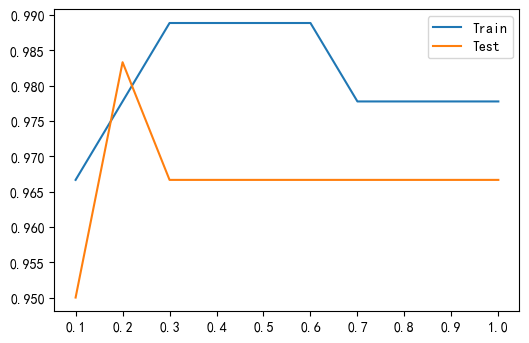

In [146]:
'''
@Author: Xin-Yu Ou (欧新宇)
@Description: 鸢尾花数据集上RBF-SVM的超参数Gamma对比
@LastEditorTime: 2020-01-26
'''
# TODO: 1. 导入必须库 以及 定义必要的函数
import numpy as np
import matplotlib.pyplot as plt
# 导入机器学习数据集处理工具
from sklearn import datasets
from sklearn.model_selection import train_test_split
# 导入支持向量机SVM
from sklearn import svm

# TODO: 2. 创建/导入数据
iris = datasets.load_iris()

# TODO: 3. 数据预处理，包括训练集、测试集划分，数据正则化，数据清洗等
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)


# TODO: 4. 构建模型，并进行模型训练（或称为拟合数据）
C = 1.0
# gamma = np.concatenate((np.linspace(0.1, 1, 10), np.linspace(2, 10, 9)), axis=0)
gamma = np.linspace(0.1, 1, 10)
num = gamma.shape[0]
scores = np.zeros([2, num])  # 第1-4列分别为：score_train_rbf,score_test_rbf
x_lim = np.arange(0, num)


for i in range(num):
    n = i + 1
    model = svm.SVC(kernel='rbf', gamma=gamma[i], C=C)
    model.fit(X_train, y_train)

    scores[0, i] = model.score(X_train, y_train)
    scores[1, i] = model.score(X_test, y_test)

plt.figure(dpi=100)
plt.plot(gamma, scores[0, :], label="Train")
plt.plot(gamma, scores[1, :], label="Test")
plt.xticks(gamma)

plt.legend(loc='best')
plt.savefig('results/Ch08Hw01SVM.png', dpi=300)
plt.show()
